In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import date,timedelta

In [ ]:
stock=input("Enter the stock symbol: ")
start_date = input(f"Enter the start date (YYYY-MM-DD): ")
end_date = input(f"Enter the end date (YYYY-MM-DD): ")

Enter the stock symbol: AAPL
Enter the start date (YYYY-MM-DD): 2017-01-01
Enter the end date (YYYY-MM-DD): 2024-06-06


Relative Strength indicator (RSI)

[*********************100%%**********************]  1 of 1 completed


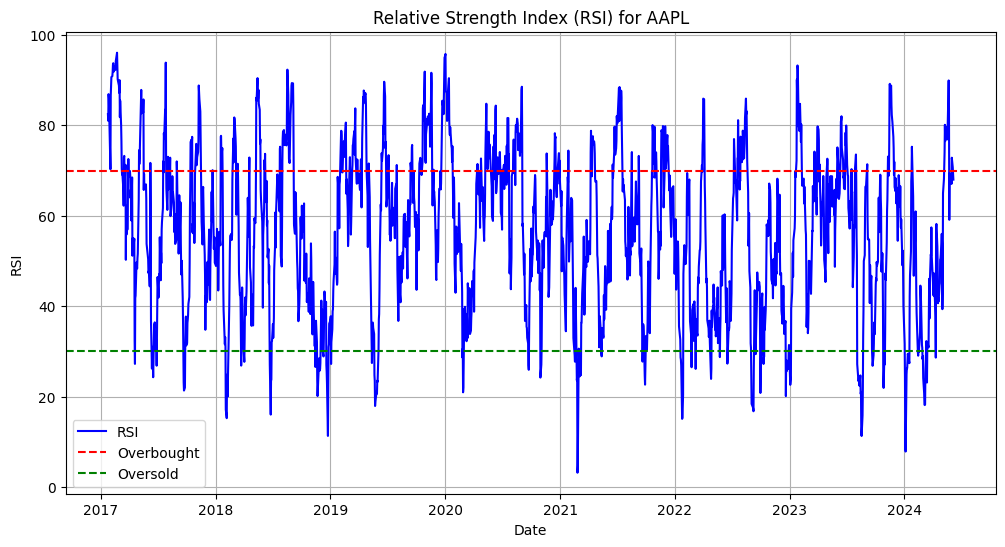

In [ ]:

def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def plot_rsi(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data['RSI'] = calculate_rsi(stock_data)

    plt.figure(figsize=(12,6))
    plt.title(f'Relative Strength Index (RSI) for {stock_symbol}')
    plt.plot(stock_data.index, stock_data['RSI'], label='RSI', color='blue')
    plt.axhline(y=70, color='r', linestyle='--', label='Overbought')
    plt.axhline(y=30, color='g', linestyle='--', label='Oversold')
    plt.ylabel('RSI')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_rsi(stock,start_date,end_date)

moving average convergence divergence (MACD)

[*********************100%%**********************]  1 of 1 completed


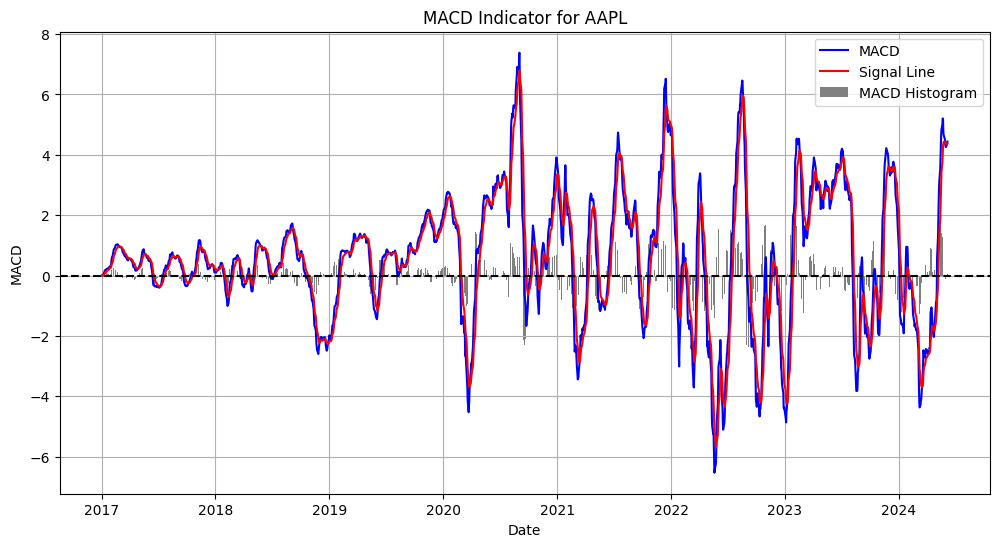

In [ ]:

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    exp1 = data['Adj Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Adj Close'].ewm(span=long_window, adjust=False).mean()
    macd = exp1 - exp2
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

def plot_macd(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    macd, signal_line = calculate_macd(stock_data)

    plt.figure(figsize=(12,6))
    plt.title(f'MACD Indicator for {stock_symbol}')
    plt.plot(stock_data.index, macd, label='MACD', color='blue')
    plt.plot(stock_data.index, signal_line, label='Signal Line', color='red')
    plt.bar(stock_data.index, macd - signal_line, label='MACD Histogram', color='gray')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.ylabel('MACD')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_macd(stock,start_date,end_date)


volume analysis and on balance volume (OBV)

[*********************100%%**********************]  1 of 1 completed


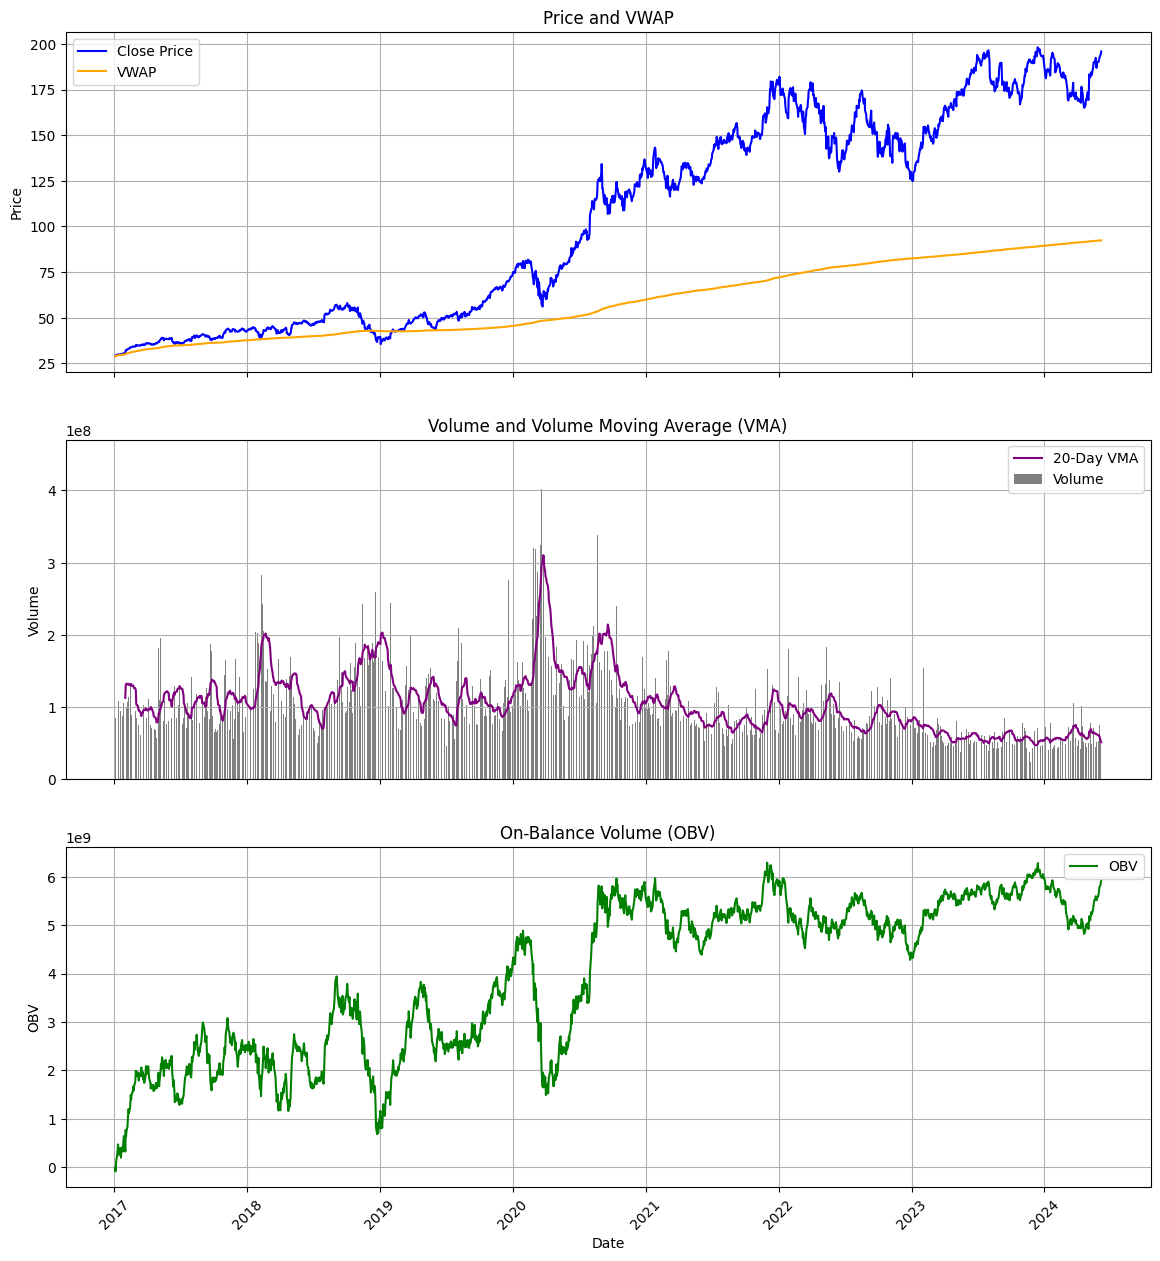

In [ ]:
# Function to calculate VWAP
def calculate_vwap(data):
    vwap = (data['Volume'] * (data['High'] + data['Low'] + data['Close']) / 3).cumsum() / data['Volume'].cumsum()
    return vwap

# Function to calculate On-Balance Volume (OBV)
def calculate_obv(data):
    obv = (data['Close'].diff().fillna(0) > 0).astype(int) * data['Volume']
    obv -= (data['Close'].diff().fillna(0) < 0).astype(int) * data['Volume']
    obv = obv.cumsum()
    return obv

# Function to plot price and volume with VWAP and volume indicators
def plot_volume_analysis(df):
    # Calculate additional indicators
    df['VWAP'] = calculate_vwap(df)
    df['OBV'] = calculate_obv(df)
    df['VMA20'] = df['Volume'].rolling(window=20).mean()

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

    # Plot closing price and VWAP
    ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
    ax1.plot(df.index, df['VWAP'], label='VWAP', color='orange')
    ax1.set_title('Price and VWAP')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    # Plot volume and VMA
    ax2.bar(df.index, df['Volume'], label='Volume', color='grey')
    ax2.plot(df.index, df['VMA20'], label='20-Day VMA', color='purple')
    ax2.set_title('Volume and Volume Moving Average (VMA)')
    ax2.set_ylabel('Volume')
    ax2.legend()
    ax2.grid(True)

    # Plot OBV
    ax3.plot(df.index, df['OBV'], label='OBV', color='green')
    ax3.set_title('On-Balance Volume (OBV)')
    ax3.set_ylabel('OBV')
    ax3.set_xlabel('Date')
    ax3.legend()
    ax3.grid(True)

    # Rotate x-axis labels for all subplots
    plt.setp(ax1.get_xticklabels(), rotation=45)
    plt.setp(ax2.get_xticklabels(), rotation=45)
    plt.setp(ax3.get_xticklabels(), rotation=45)

    # Show plot
    plt.show()

# Download stock data
df = yf.download(stock, start=start_date, end=end_date)

# Plot volume analysis with VWAP and volume indicators
plot_volume_analysis(df)
